Universidad del Valle de Guatemala   <br> 
Facultad de Ingeniería    <br>
Data Science    <br>
Andrés Paiz Caniz <b>191142</b> <br>
René Ventura <b></b> 
</p>

<div align="center"><b>
Laboratorio #4 </h1>
    

Se importan las librerias que pensamos utilizar durante el lab.

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns 
import re 
from sklearn.cluster import AgglomerativeClustering  
import neattext as nt
import matplotlib.pyplot as plt 
import nltk 
from wordcloud import WordCloud 
from nltk import word_tokenize 
from nltk.corpus import stopwords 
from nltk.util import ngrams 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textdistance
import re
import unicodedata 
import string
from collections import Counter, defaultdict 
import zipfile
import random 
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt



Se carga el archivo train 


Observamos los datos que se cargaron, tienen 5 columnas correspondiendo a:

id: El identificador del tweet 

keyword: una palabra clave del tweet, puede estar en blanco 

location: la ubicación desde donde fue enviado el tweet 

text: El texto del tweet 

target: La etiqueta de clasificación que especifica si el tweet se trata de un desastre real (1) o no (0). 
 

In [76]:
df = pd.read_csv("train lab4.csv")
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Se puede observar que no todas las columnas son objetivos de limpieza.

In [77]:
df["location"] = df['location'].str.lower()
df["text"] = df['text'].str.lower()
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


No se cambian todas las columnas ya que solo location y text tienen mayusculas.

Procedemos a quitar los caracteres especiales (#,@,& y apostrofes)

In [78]:
df["text"] = df["text"].str.replace('[#,@,&]','')
df["location"] = df["location"].str.replace('[#,@,&]','')
df.replace('\'','', regex=True, inplace=True)
df


C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\879392010.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[#,@,&]','')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\879392010.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["location"] = df["location"].str.replace('[#,@,&]','')


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


Quitamos los urls 

In [79]:
df["text"] = df["text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df["text"] = df["text"].str.replace(r'\s*http?://\S+(\s+|$)', ' ').str.strip()
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\2837192449.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\2837192449.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace(r'\s*http?://\S+(\s+|$)', ' ').str.strip()


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii.,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


Quitamos emojis al igual que caracteres especiales restantes ( incluyendo punctuacion )

In [80]:
df['text'] = df['text'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)
df['location'] = df['location'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\2802614462.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\2802614462.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['location'] = df['location'].str.replace('[^A-Za-z0-9]', ' ', flags=re.UNICODE)


,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria ahrary thetawniest the out of control wil...,1
7610,10871,NaN,NaN,m1 94 01 04 utc 5km s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an e bike collided ...,1


Eliminamos las stopwords utilizando nltk para descargar la lista de stopwords a eliminar


In [81]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,aria ahrary thetawniest control wild fires cal...,1
7610,10871,NaN,NaN,m1 94 01 04 utc 5km volcano hawaii,1
7611,10872,NaN,NaN,police investigating e bike collided car littl...,1


Eliminamos numeros inecesarios.

In [89]:
if(not "911" in df.text):

    df['text'] = df['text'].str.replace('\d+', '')
df


C:\Users\Usuario\AppData\Local\Temp\ipykernel_520\369998405.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


,id,keyword,location,text,target
0,1,,,deeds reason earthquake may allah forgive us,1
1,4,,,forest fire near la ronge sask canada,1
2,5,,,residents asked shelter place notified officer...,1
3,6,,,people receive wildfires evacuation orders ca...,1
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,,,two giant cranes holding bridge collapse nearb...,1
7609,10870,,,aria ahrary thetawniest control wild fires cal...,1
7610,10871,,,m utc km volcano hawaii,1
7611,10872,,,police investigating e bike collided car littl...,1


Analisis Exploratorio


Empezamos por mostrar las palabras que más se repiten


In [90]:
final_string = ""
for i in df["keyword"]:
    final_string += str(i) + " "
final_string = final_string[:-1]

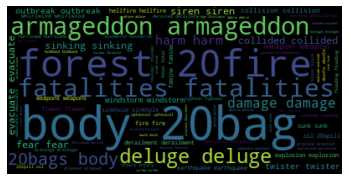

In [91]:
wordcloud = WordCloud().generate(str(final_string))

plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Se observa que existen Na todavia por lo que eliminamos esos datos para que no afecten los resultados.

In [85]:
df.fillna('',inplace=True)
df

,id,keyword,location,text,target
0,1,,,deeds reason earthquake may allah forgive us,1
1,4,,,forest fire near la ronge sask canada,1
2,5,,,residents asked shelter place notified officer...,1
3,6,,,13000 people receive wildfires evacuation orde...,1
4,7,,,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,,,two giant cranes holding bridge collapse nearb...,1
7609,10870,,,aria ahrary thetawniest control wild fires cal...,1
7610,10871,,,m1 94 01 04 utc 5km volcano hawaii,1
7611,10872,,,police investigating e bike collided car littl...,1


Volvemos a hacer la wordcloud para mostrar las palabras mas comunes sin los na.

In [86]:
final_string = ""
for i in df["keyword"]:
    final_string += str(i) + " "
final_string = final_string[:-1]

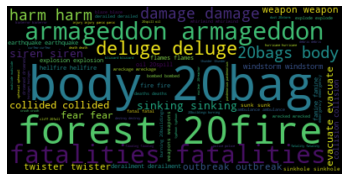

In [87]:
wordcloud = WordCloud().generate(str(final_string))

plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [97]:
words = [word for word, _ in final_string]
counts = [counts for _, counts in final_string]

plt.bar(words, counts)
plt.title("10 most frequent tokens in description")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)